In [1]:
import json
from sklearn.model_selection import train_test_split
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

In [2]:
def read_fake_likers():
    file_arr = ['2011' , '2012' , '2013' , 'recent']
    fake_likers = {}
    fake_news_id = []
    for file_name in file_arr:
        file = 'fake_likers_'+file_name+'.json'
        print("reading" , file , end = '  ')
        with open(file) as f:
            dct = json.load(f)
            likers_arr = dct.keys()
            print("... processing {} likers".format(len(likers_arr)))
            for liker in likers_arr:
                if(liker not in fake_likers):
                    fake_likers[liker] = []
                for news_id in dct[liker]:
                    if(news_id not in fake_news_id):
                        fake_news_id.append(news_id)
                    if(news_id not in fake_likers[liker]):
                        fake_likers[liker].append(news_id)
    return fake_likers , fake_news_id

In [3]:
fake_likers , fake_news_id = read_fake_likers()

reading fake_likers_2011.json  ... processing 92 likers
reading fake_likers_2012.json  ... processing 409 likers
reading fake_likers_2013.json  ... processing 3021 likers
reading fake_likers_recent.json  ... processing 11239 likers


In [4]:
len(fake_news_id)

505

In [5]:
len(fake_likers.keys())

13228

In [6]:
likers = list(fake_likers.keys())
for i in range(5):
    print(likers[i] , " :: " , fake_likers[likers[i]])

/md.mahmud.pavel  ::  ['421015061269280']
/chandrashekhar.bhattacharyya.7  ::  ['641164909260635', '633646770012449']
/wahid.istiaq  ::  ['862126497164474', '763014783742313', '760201394023652', '725195910857534']
/profile.php?id=100007950486616  ::  ['863174493726341']
/sagor.hosemn  ::  ['717936001583525', '738218452878780']


In [7]:
def read_real_likers():
    file_arr = ['recent']
    real_likers = {}
    real_news_id = []
    for file_name in file_arr:
        file = 'real_likers_'+file_name+'.json'
        print("reading" , file , end = '  ')
        with open(file) as f:
            dct = json.load(f)
            likers_arr = dct.keys()
            print("... processing {} likers".format(len(likers_arr)))
            for liker in likers_arr:
                if(liker not in real_likers):
                    real_likers[liker] = []
                for news_id in dct[liker]:
                    if(news_id not in real_news_id):
                        real_news_id.append(news_id)
                    if(news_id not in real_likers[liker]):
                        real_likers[liker].append(news_id)
    return real_likers , real_news_id

In [8]:
real_likers , real_news_id = read_real_likers()

reading real_likers_recent.json  ... processing 13416 likers


In [9]:
print(type(real_likers) , type(real_news_id))

<class 'dict'> <class 'list'>


In [10]:
len(real_news_id)

405

In [11]:
len(real_likers.keys())

13416

In [12]:
likers = list(fake_likers.keys()) + list(real_likers.keys())
likers = list(set(likers))
likers2news = {}
for usr in fake_likers.keys():
    if(usr not in likers2news):
        likers2news[usr] = fake_likers[usr]
    else:
        likers2news[usr] += fake_likers[usr]
        
for usr in real_likers.keys():
    if(usr not in likers2news):
        likers2news[usr] = real_likers[usr]
    else:
        likers2news[usr] += real_likers[usr]
        
random.shuffle(likers)

In [13]:
len(likers)

26644

In [14]:
X = []
y = []
for news_id in real_news_id:
    X.append(news_id)
    y.append('REAL')
for news_id in fake_news_id:
    X.append(news_id)
    y.append('FAKE')
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

In [15]:
vector_train = np.zeros((len(X_train) , len(likers)))
for i in range(len(X_train)):
    if(i%100 == 0):
        print("processed {} news_id".format(i))
    news_id = X_train[i]
    for j in range(len(likers)):
        liker = likers[j]
        if(news_id in likers2news[liker]):
            vector_train[i][j] = 1
        else:
            vector_train[i][j] = 0
print("vector_train is ready" , vector_train.shape)

processed 0 news_id
processed 100 news_id
processed 200 news_id
processed 300 news_id
processed 400 news_id
processed 500 news_id
processed 600 news_id
vector_train is ready (609, 26644)


In [16]:
vector_test = np.zeros((len(X_test) , len(likers)))
for i in range(len(X_test)):
    if(i%100 == 0):
        print("processed {} news_id".format(i))
    news_id = X_test[i]
    for j in range(len(likers)):
        liker = likers[j]
        if(news_id in likers2news[liker]):
            vector_test[i][j] = 1
        else:
            vector_test[i][j] = 0
print("vector_test is ready" , vector_test.shape)

processed 0 news_id
processed 100 news_id
processed 200 news_id
processed 300 news_id
vector_test is ready (301, 26644)


In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues , mode = 'normal'):
    if(mode == 'percent'):
        cm = cm*100/cm.sum()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with little normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        strr = str(cm[i,j])
        if(mode == 'percent'):
            strr = str(round(cm[i, j] , 2)) + '%'
        plt.text(j, i, strr ,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

accuracy:   0.997
Confusion matrix, with little normalization


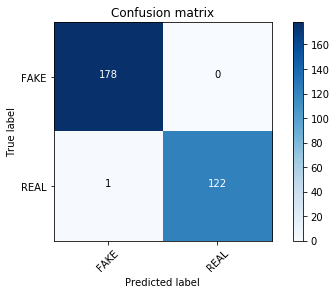

Confusion matrix, with little normalization


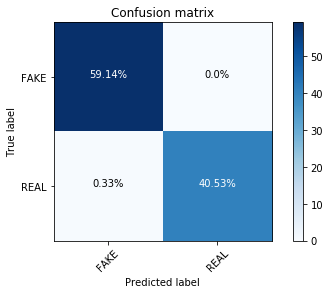

In [47]:
from sklearn.linear_model import PassiveAggressiveClassifier
pass_clf = PassiveAggressiveClassifier(max_iter=50 , random_state = 17)

pass_clf.fit(vector_train, y_train)
pred = pass_clf.predict(vector_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'] , mode = 'percent')

In [42]:
cm/cm.sum()

array([[ 0.59136213,  0.        ],
       [ 0.00332226,  0.40531561]])

accuracy:   1.000
Confusion matrix, with little normalization


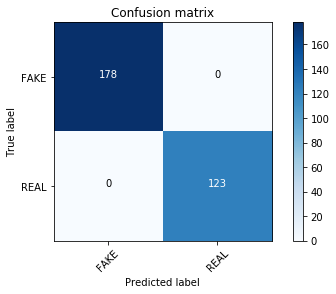

In [39]:
from sklearn.naive_bayes import MultinomialNB
clf_tree = MultinomialNB() 

clf_tree.fit(vector_train, y_train)
pred_tree = clf_tree.predict(vector_test)

score = metrics.accuracy_score(y_test, pred_tree)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_tree, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [29]:
a = 10/3
round(a , 2)

3.33